In [1]:
import numpy as np
import os
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

In [1]:
import zipfile

# Path to the ZIP file
zip_file_path = "C:\\Users\\palay\\OneDrive\\Desktop\\corn\\potato.zip"

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List all files in the ZIP
    file_list = zip_ref.namelist()
    print("Files in the ZIP:", file_list)
    
    # Extract all files to a directory
    zip_ref.extractall("extracted_files")  # Specify the folder to extract to
    print("Files extracted to 'extracted_files'")
    
    # Read the content of a specific file
    with zip_ref.open(file_list[0]) as file:
        content = file.read().decode('utf-8')  # Assuming the file is a text file
        print(f"Content of {file_list[0]}:")
        print(content)


Files in the ZIP: ['PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_1.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_10.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_100.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_101.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_102.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_103.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_104.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_105.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_106.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_107.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_108.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_109.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_11.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_110.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_111.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

In [3]:

zip_path="C:\\Users\\palay\\OneDrive\\Desktop\\corn\\potato.zip"
import zipfile


with zipfile.ZipFile(zip_path, "r") as zip_ref:
    file_list = zip_ref.namelist()
    print("Files in ZIP:", file_list)

    with zip_ref.open(file_list[0]) as file:
        try:
            content = file.read().decode("utf-8")  # Try decoding as UTF-8
            print("Content:", content[:500])  # Print only first 500 characters
        except UnicodeDecodeError:
            print(f"⚠️ {file_list[0]} is NOT a UTF-8 text file.")


Files in ZIP: ['PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_1.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_10.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_100.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_101.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_102.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_103.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_104.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_105.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_106.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_107.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_108.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_109.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_11.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_110.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Early_Blight_111.jpg', 'PLD_3_Classes_256/Testing/Early_Blight/Earl

In [5]:
INIT_LR = 1e-3
BATCH_SIZE = 32
EPOCHS = 50
IMAGE_SIZE = 256
default_image_size = tuple((IMAGE_SIZE, IMAGE_SIZE))
image_size = 0
data_dir = "PlantVillage"
CHANNELS=3


In [6]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = ds.cardinality().numpy()
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [8]:
import tensorflow as tf

In [10]:
data_dir="C:\\Users\\palay\\OneDrive\\Desktop\\corn\\wheat\\extracted_files\\PLD_3_Classes_256"

In [11]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=default_image_size,
  batch_size=BATCH_SIZE
)


train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


Found 4072 files belonging to 3 classes.


In [12]:
class_names = dataset.class_names
n_classes = len(class_names)
print(n_classes, class_names)

3 ['Testing', 'Training', 'Validation']


In [14]:
import matplotlib.pyplot as plt

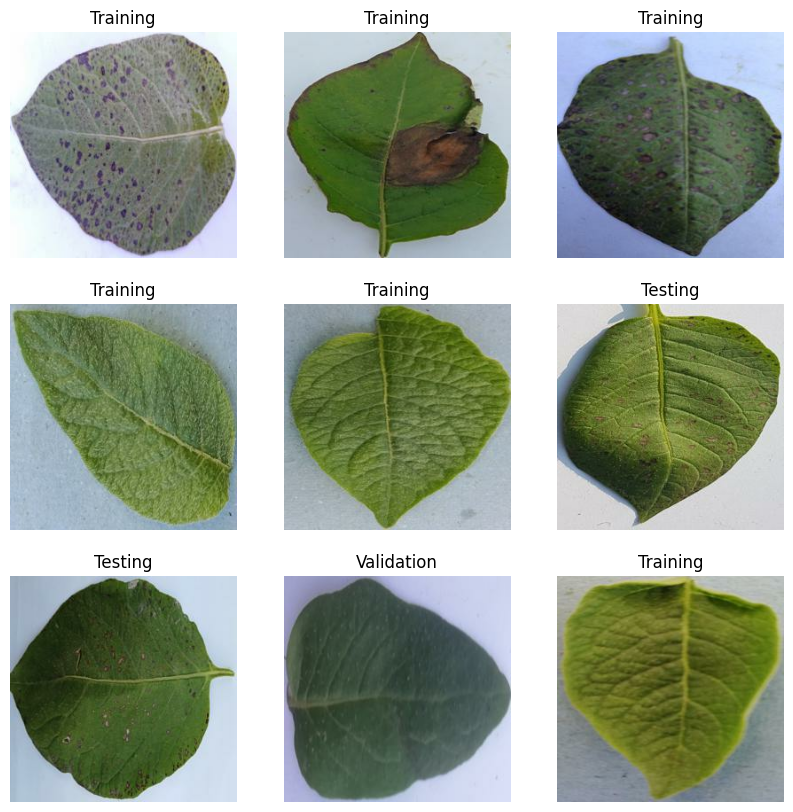

In [15]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [16]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [21]:
AUTOTUNE = tf.data.AUTOTUNE  
from tensorflow.keras import layers


In [22]:

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [24]:
import tensorflow as tf
from tensorflow.keras import layers

IMAGE_SIZE = 224  # Define image size

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])


In [26]:
import tensorflow as tf
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])


In [28]:
from tensorflow.keras import backend as K


In [31]:

import tensorflow as tf
from tensorflow.keras import backend as K  # ✅ Import K

BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS = 3

batch_input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
chanDim = -1

if K.image_data_format() == "channels_first":
    input_shape = (CHANNELS, IMAGE_SIZE, IMAGE_SIZE)
    batch_input_shape = (BATCH_SIZE, CHANNELS, IMAGE_SIZE, IMAGE_SIZE)
else:
    input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)


In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models  # ✅ Import models

In [34]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=batch_input_shape)


c:\Users\palay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 222, 222, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 111, 111, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 109, 109, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 54, 54, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 52, 52, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 26, 26, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 24, 24, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 12, 12, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 10, 10, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 5, 5, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 3, 3, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 1, 1, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,459 (669.76 KB)

 Trainable params: 171,459 (669.76 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.8049 - loss: 0.6951 - val_accuracy: 0.8125 - val_loss: 0.6138
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.8049 - loss: 0.6380 - val_accuracy: 0.8125 - val_loss: 0.6252
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.8132 - loss: 0.6385 - val_accuracy: 0.8125 - val_loss: 0.6185
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.7947 - loss: 0.6573 - val_accuracy: 0.8125 - val_loss: 0.6173
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.8019 - loss: 0.6375 - val_accuracy: 0.8125 - val_loss: 0.6113
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.8083 - loss: 0.6208 - val_accuracy: 0.8125 - val_loss: 0.6110
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.7990 - loss: 0.6448 - val_accuracy: 0.8125 - val_loss: 0.6120
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.8026 - loss: 0.6379 - val_accu